In [ ]:
import pandas as pd
import numpy as np
import io
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
#from category_encoders import TargetEncoder
#import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
import geohash as gh

In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving Police_Department_Incident_Reports__2018_to_Present.csv to Police_Department_Incident_Reports__2018_to_Present (1).csv


In [ ]:
#df = pd.read_csv("C:/Users/kcheru3/Downloads/Police_Department_Incident_Reports__2018_to_Present.csv")
df = pd.read_csv(io.BytesIO(uploaded['Police_Department_Incident_Reports__2018_to_Present.csv']))

In [ ]:
pd.set_option("display.max_columns", None)
df.head(5)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2021/09/29 12:59:00 PM,2021/09/29,12:59,2021,Wednesday,2021/09/29 06:48:00 PM,107597928150,1075979,216138427,NaN,II,Coplogic Initial,True,28150,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Property",Open or Active,NaN,NaN,Ingleside,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021/05/14 01:51:00 AM,2021/05/14,01:51,2021,Friday,2021/05/14 01:57:00 AM,103010326030,1030103,210295348,211340138.0,II,Initial,NaN,26030,Arson,Arson,Arson,Open or Active,03RD ST \ CUSTER AVE,20240000.0,Bayview,Bayview Hunters Point,10.0,37.744259,-122.387373,POINT (-122.38737260846696 37.74425940578451),56.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0
2,2021/03/01 08:00:00 AM,2021/03/01,08:00,2021,Monday,2021/09/26 11:40:00 AM,107606971000,1076069,216138659,NaN,II,Coplogic Initial,True,71000,Lost Property,Lost Property,Lost Property,Open or Active,NaN,NaN,Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/04/01 12:00:00 PM,2021/04/01,12:00,2021,Thursday,2021/05/04 09:22:00 AM,102792271000,1027922,216049830,NaN,II,Coplogic Initial,True,71000,Lost Property,Lost Property,Lost Property,Open or Active,NaN,NaN,Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021/06/01 07:01:00 AM,2021/06/01,07:01,2021,Tuesday,2021/09/19 06:21:00 AM,107592206244,1075922,216138552,NaN,II,Coplogic Initial,True,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df['Report Type Code'].unique())
print('\n')
print(df['Report Type Description'].unique())
print('\n')
print(df['Incident Code'].unique())
print('\n')
print(df['Incident Category'].unique())
print('\n')
print(df['Analysis Neighborhood'].unique())

['II' 'IS' 'VI' 'VS']


['Coplogic Initial' 'Initial' 'Coplogic Supplement' 'Vehicle Initial'
 'Initial Supplement' 'Vehicle Supplement']


[28150 26030 71000  6244 64070 27195  7055 64020  5081  6243 28160  4144
 12100 71013  6224 12030  7023 64085  7021  7041 72000  6303 27090 12027
 28135 63010  5041  5043  9024  7046  4022 64010  4134 16652  6372 16622
 27300  6371 15200 51040  5153  7045 15300 19057  5011  9027 26080 71012
  5073 68020  7020  6242  7025  5013  6363  6125  5082  6374 74000 12008
 65010 75025  7043 16623  6373  5012 27175  3051 61030  4170  9029  6313
  4013  6304  5051  6241  3071  9250  6240  3074 28161  6233 27170  4011
  3081  6362  4014 28165  3401  7026  6151 12015 27198 28092 65015  6234
  6301  3014 68060  3471 15161  6153 16220  4138  5151  4074 16650 75000
  5061  3073 65016 12173 27199  6360  9026  4012  9320 16710 16780  3024
 62050 26031 11012 19090  4092  6364 68030 75030 62020 65020 16660  4136
  6302 68000 12080  3464 28100  5083 65021  5053 68055  5

In [ ]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)

    print("##################### Types #####################")
    print(dataframe.dtypes)

    print("##################### Head #####################")
    print(dataframe.head(head))

    print("##################### Tail #####################")
    print(dataframe.tail(head))
    
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

##################### Shape #####################
(576314, 34)
##################### Types #####################
Incident Datetime                                        object
Incident Date                                            object
Incident Time                                            object
Incident Year                                             int64
Incident Day of Week                                     object
Report Datetime                                          object
Row ID                                                    int64
Incident ID                                               int64
Incident Number                                           int64
CAD Number                                              float64
Report Type Code                                         object
Report Type Description                                  object
Filed Online                                             object
Incident Code                                          

In [ ]:
df['Incident Time'] = pd.to_datetime(df['Incident Time']).dt.hour
df['Incident Date'] = pd.to_datetime(df['Incident Date']).dt.week
df = df.rename({'Incident Date':'Incident Week'}, axis='columns')
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,Incident Datetime,Incident Week,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2021/09/29 12:59:00 PM,39,12,2021,Wednesday,2021/09/29 06:48:00 PM,107597928150,1075979,216138427,NaN,II,Coplogic Initial,True,28150,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Property",Open or Active,NaN,NaN,Ingleside,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021/05/14 01:51:00 AM,19,1,2021,Friday,2021/05/14 01:57:00 AM,103010326030,1030103,210295348,211340138.0,II,Initial,NaN,26030,Arson,Arson,Arson,Open or Active,03RD ST \ CUSTER AVE,20240000.0,Bayview,Bayview Hunters Point,10.0,37.744259,-122.387373,POINT (-122.38737260846696 37.74425940578451),56.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0
2,2021/03/01 08:00:00 AM,9,8,2021,Monday,2021/09/26 11:40:00 AM,107606971000,1076069,216138659,NaN,II,Coplogic Initial,True,71000,Lost Property,Lost Property,Lost Property,Open or Active,NaN,NaN,Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/04/01 12:00:00 PM,13,12,2021,Thursday,2021/05/04 09:22:00 AM,102792271000,1027922,216049830,NaN,II,Coplogic Initial,True,71000,Lost Property,Lost Property,Lost Property,Open or Active,NaN,NaN,Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021/06/01 07:01:00 AM,22,7,2021,Tuesday,2021/09/19 06:21:00 AM,107592206244,1075922,216138552,NaN,II,Coplogic Initial,True,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576309,2021/01/15 08:00:00 PM,2,20,2021,Friday,2021/01/18 11:03:00 PM,99729103074,997291,210041000,210183477.0,II,Initial,NaN,3074,Robbery,Robbery - Other,"Robbery, W/ Force",Cite or Arrest Adult,OFARRELL ST \ SHANNON ST,24944000.0,Tenderloin,Tenderloin,6.0,37.785893,-122.412148,POINT (-122.41214750780264 37.78589292711297),20.0,NaN,1.0,NaN,NaN,NaN,10.0,5.0
576310,2020/08/01 05:34:00 PM,31,17,2020,Saturday,2020/08/01 06:04:00 PM,94911806361,949118,200461010,202142200.0,II,Initial,NaN,6361,Larceny Theft,Larceny Theft - Shoplifting,"Theft, Shoplifting, <$50",Open or Active,GEARY BLVD \ 17TH AVE,27500000.0,Richmond,Outer Richmond,1.0,37.780476,-122.476169,POINT (-122.47616919036905 37.780475849410344),5.0,NaN,NaN,NaN,NaN,NaN,4.0,8.0
576311,2020/06/01 01:55:00 AM,23,1,2020,Monday,2020/06/01 01:55:00 AM,93192005061,931920,200330863,201530294.0,II,Initial,NaN,5061,Burglary,Burglary - Commercial,"Burglary, Warehouse, Forcible Entry",Open or Active,24TH ST \ MINNESOTA ST,23610000.0,Bayview,Potrero Hill,10.0,37.754000,-122.389860,POINT (-122.38985954971992 37.75399971361786),56.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0
576312,2020/10/24 05:00:00 PM,43,17,2020,Saturday,2020/10/24 06:34:00 PM,97231606244,972316,200642975,202982445.0,II,Initial,NaN,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,STEINER ST \ FULTON ST,26042000.0,Northern,Western Addition,5.0,37.777490,-122.433219,POINT (-122.43321873935555 37.777490366353746),23.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0


In [ ]:
#df['Incident Week'] = df['Incident Week'].astype(str)
#df['Incident Time'] = df['Incident Time'].astype(str)
#df['Incident Year'] = df['Incident Year'].astype(str)

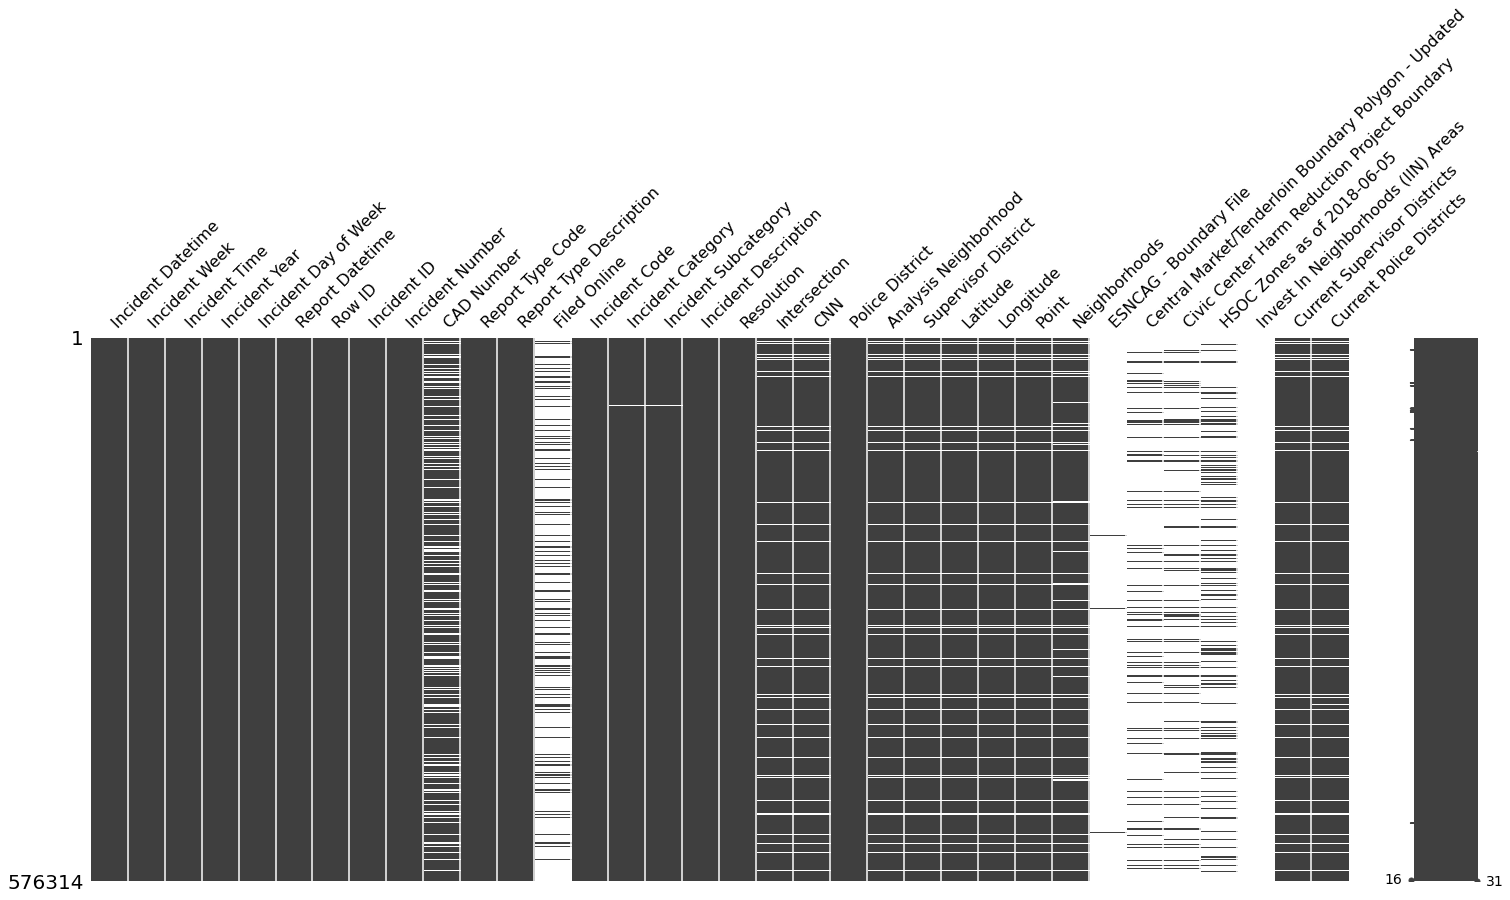

In [ ]:
msno.matrix(df)

In [ ]:
df = df.drop(columns = ['Filed Online','ESNCAG - Boundary File','Central Market/Tenderloin Boundary Polygon - Updated','Civic Center Harm Reduction Project Boundary','HSOC Zones as of 2018-06-05','Invest In Neighborhoods (IIN) Areas'])

In [ ]:
df = df.drop(columns = ['Incident Datetime','Report Datetime','Row ID','Incident Number','CAD Number','Incident Subcategory','Incident Code','Incident Description','CNN','Neighborhoods', 'Current Supervisor Districts','Current Police Districts','Point'])

In [ ]:
df.head()

,Incident Week,Incident Time,Incident Year,Incident Day of Week,Incident ID,Report Type Code,Report Type Description,Incident Category,Resolution,Intersection,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude
0,39,12,2021,Wednesday,1075979,II,Coplogic Initial,Malicious Mischief,Open or Active,NaN,Ingleside,NaN,NaN,NaN,NaN
1,19,1,2021,Friday,1030103,II,Initial,Arson,Open or Active,03RD ST \ CUSTER AVE,Bayview,Bayview Hunters Point,10.0,37.744259,-122.387373
2,9,8,2021,Monday,1076069,II,Coplogic Initial,Lost Property,Open or Active,NaN,Southern,NaN,NaN,NaN,NaN
3,13,12,2021,Thursday,1027922,II,Coplogic Initial,Lost Property,Open or Active,NaN,Park,NaN,NaN,NaN,NaN
4,22,7,2021,Tuesday,1075922,II,Coplogic Initial,Larceny Theft,Open or Active,NaN,Southern,NaN,NaN,NaN,NaN


In [ ]:
# df manipulated is the dataframe with converted datatypes and dropped columns
df_manipulated = df 

In [ ]:
print(df.shape,'\n')
print(df.dtypes,'\n')
print(df.isna().sum())

(576314, 15) 

Incident Week                int64
Incident Time                int64
Incident Year                int64
Incident Day of Week        object
Incident ID                  int64
Report Type Code            object
Report Type Description     object
Incident Category           object
Resolution                  object
Intersection                object
Police District             object
Analysis Neighborhood       object
Supervisor District        float64
Latitude                   float64
Longitude                  float64
dtype: object 

Incident Week                  0
Incident Time                  0
Incident Year                  0
Incident Day of Week           0
Incident ID                    0
Report Type Code               0
Report Type Description        0
Incident Category            497
Resolution                     0
Intersection               29875
Police District                0
Analysis Neighborhood      29987
Supervisor District        29875
Latitude       

In [ ]:
print(df['Incident Category'].value_counts(dropna=False))
print('\n')
print(df['Intersection'].value_counts(dropna=False))
print('\n')
print(df['Analysis Neighborhood'].value_counts(dropna=False))

Larceny Theft                                   174828
Other Miscellaneous                              41451
Malicious Mischief                               38941
Non-Criminal                                     34944
Assault                                          34679
Burglary                                         32852
Motor Vehicle Theft                              28357
Recovered Vehicle                                21812
Warrant                                          17631
Fraud                                            17364
Lost Property                                    17093
Drug Offense                                     13445
Robbery                                          13075
Missing Person                                   12697
Suspicious Occ                                   11763
Disorderly Conduct                                9596
Offences Against The Family And Children          8079
Traffic Violation Arrest                          6088
Miscellane

In [ ]:
# df1 will be our dataframe to fill in missing values
df1 = df

In [ ]:
df1['Incident Category'] = df1['Incident Category'].fillna(df1['Incident Category'].value_counts().index[0])
df1 = df1.dropna(subset=['Intersection'])
df1['Analysis Neighborhood'] = df1['Analysis Neighborhood'].fillna(method = 'ffill')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


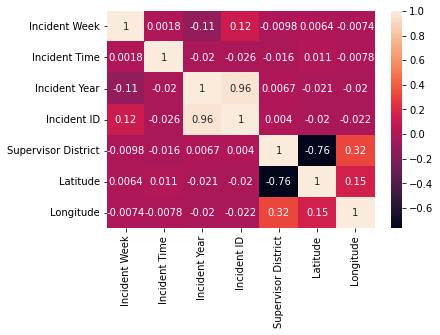

In [ ]:
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
sns.set(rc = {'figure.figsize':(30,16)})
plt.show()

In [ ]:
# df2 will be our dataframe to change datatype
df2 = df1

In [ ]:
week_day_dict = {'Monday':1,'Tuesday' : 2,'Wednesday' : 3,'Thursday' : 4,'Friday' : 5,'Saturday' :6,'Sunday' :7}

In [ ]:
df2['Ranked Incident Day of Week'] = df2['Incident Day of Week'].map(week_day_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.head()

,Incident Week,Incident Time,Incident Year,Incident Day of Week,Incident ID,Report Type Code,Report Type Description,Incident Category,Resolution,Intersection,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Ranked Incident Day of Week
1,19,1,2021,Friday,1030103,II,Initial,Arson,Open or Active,03RD ST \ CUSTER AVE,Bayview,Bayview Hunters Point,10.0,37.744259,-122.387373,5
12,19,6,2021,Friday,1030335,II,Initial,Suspicious Occ,Open or Active,STEUART ST \ MISSION ST,Central,Financial District/South Beach,3.0,37.793230,-122.393181,5
13,19,12,2021,Friday,1030322,II,Initial,Other Miscellaneous,Open or Active,BRANNAN ST \ 08TH ST,Southern,South of Market,6.0,37.771296,-122.405425,5
14,19,14,2021,Friday,1030299,VI,Vehicle Initial,Motor Vehicle Theft,Open or Active,NEWCOMB AVE \ BARNEVELD AVE,Bayview,Bayview Hunters Point,10.0,37.743124,-122.403275,5
15,19,2,2021,Friday,1030108,II,Initial,Non-Criminal,Open or Active,ESSEX ST \ FOLSOM ST,Southern,Financial District/South Beach,6.0,37.786379,-122.395645,5


In [ ]:
df2.drop(columns = ['Incident Day of Week'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# checking features
cat = df2.select_dtypes(include='O').keys()
# display variabels
cat

Index(['Report Type Code', 'Report Type Description', 'Incident Category',
       'Resolution', 'Intersection', 'Police District',
       'Analysis Neighborhood'],
      dtype='object')

In [ ]:
one_hot_encoded_data = pd.get_dummies(df2, columns = ['Report Type Code', 'Report Type Description', 'Incident Category'])
print(one_hot_encoded_data)

        Incident Week  Incident Time  Incident Year  Incident ID  \
1                  19              1           2021      1030103   
12                 19              6           2021      1030335   
13                 19             12           2021      1030322   
14                 19             14           2021      1030299   
15                 19              2           2021      1030108   
...               ...            ...            ...          ...   
576309              2             20           2021       997291   
576310             31             17           2020       949118   
576311             23              1           2020       931920   
576312             43             17           2020       972316   
576313             47              8           2020       979883   

                  Resolution                 Intersection Police District  \
1             Open or Active         03RD ST \ CUSTER AVE         Bayview   
12            Open or Active 

In [ ]:
one_hot_encoded_data1 = pd.get_dummies(one_hot_encoded_data, columns = ['Resolution', 'Intersection'])
print(one_hot_encoded_data1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
one_hot_encoded_data2 = pd.get_dummies(one_hot_encoded_data1, columns = ['Police District','Analysis Neighborhood'])
print(one_hot_encoded_data2)

In [ ]:
one_hot_encoded_data2.shape

NameError: ignored

In [ ]:
df2.head()

,Incident Week,Incident Time,Incident Year,Incident ID,Report Type Code,Report Type Description,Incident Category,Resolution,Intersection,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Ranked Incident Day of Week
1,19,1,2021,1030103,II,Initial,Arson,Open or Active,03RD ST \ CUSTER AVE,Bayview,Bayview Hunters Point,10.0,37.744259,-122.387373,5
12,19,6,2021,1030335,II,Initial,Suspicious Occ,Open or Active,STEUART ST \ MISSION ST,Central,Financial District/South Beach,3.0,37.793230,-122.393181,5
13,19,12,2021,1030322,II,Initial,Other Miscellaneous,Open or Active,BRANNAN ST \ 08TH ST,Southern,South of Market,6.0,37.771296,-122.405425,5
14,19,14,2021,1030299,VI,Vehicle Initial,Motor Vehicle Theft,Open or Active,NEWCOMB AVE \ BARNEVELD AVE,Bayview,Bayview Hunters Point,10.0,37.743124,-122.403275,5
15,19,2,2021,1030108,II,Initial,Non-Criminal,Open or Active,ESSEX ST \ FOLSOM ST,Southern,Financial District/South Beach,6.0,37.786379,-122.395645,5


# Classification of crime into classes

In [ ]:
df2["Incident Category"].unique()

array(['Arson', 'Suspicious Occ', 'Other Miscellaneous',
       'Motor Vehicle Theft', 'Non-Criminal', 'Burglary', 'Larceny Theft',
       'Malicious Mischief', 'Assault', 'Weapons Carrying Etc',
       'Weapons Offense', 'Lost Property', 'Recovered Vehicle', 'Warrant',
       'Fraud', 'Drug Offense',
       'Offences Against The Family And Children', 'Disorderly Conduct',
       'Other Offenses', 'Miscellaneous Investigation', 'Missing Person',
       'Suspicious', 'Traffic Violation Arrest', 'Robbery', 'Other',
       'Traffic Collision', 'Drug Violation', 'Stolen Property',
       'Courtesy Report', 'Case Closure', 'Fire Report', 'Vandalism',
       'Forgery And Counterfeiting', 'Sex Offense', 'Vehicle Impounded',
       'Suicide', 'Vehicle Misplaced',
       'Human Trafficking (A), Commercial Sex Acts', 'Civil Sidewalks',
       'Prostitution', 'Homicide', 'Embezzlement', 'Liquor Laws', 'Rape',
       'Weapons Offence', 'Motor Vehicle Theft?', 'Gambling',
       'Human Trafficking,

In [ ]:
crime_classification = {
    'Malicious Mischief' : 'Property Crime',
    'Arson': 'Property Crime' , 
    'Lost Property' : 'Theft', 
    'Larceny Theft': 'Theft',
    'Suspicious Occ' : 'Public order', 
    'Other Miscellaneous': 'Other', 
    'Motor Vehicle Theft' : 'Theft',
    'Non-Criminal': 'Other', 
    'Burglary': 'Theft', 
    'Assault' : 'Offence', 
    'Weapons Carrying Etc': 'Public order',
    'Weapons Offense' : 'Public order', 
    'Recovered Vehicle' : 'Public order', 
    'Warrant' : 'Other', 
    'Fraud' : 'White-collor crime',
    'Drug Offense' : 'Offence', 
    'Offences Against The Family And Children' : 'Offence',
    'Disorderly Conduct': 'Public order', 
    'Other Offenses' : 'Offence',
    'Miscellaneous Investigation' : 'Other', 
    'Missing Person' : 'Suicide' , 
    'Suspicious' : 'Public order',
    'Traffic Violation Arrest' : 'Public order', 
    'Robbery' : 'Theft', 
    'Other' : 'Other',
    'Traffic Collision' : 'Public order', 
    'Drug Violation' : 'Public order', 
    'Stolen Property' : 'Theft',
    'Courtesy Report' : 'Other', 
    'Case Closure' : 'Other', 
    'Fire Report' : 'Other', 
    'Vandalism': 'Property Crime',
    'Forgery And Counterfeiting' : 'White-collor crime', 
    'Sex Offense' : 'Offence', 
    'Vehicle Impounded' : 'Public order',
    'Suicide': 'Suicide', 
    'Vehicle Misplaced' : 'Theft', 
    'Homicide' : 'Offence',
    'Human Trafficking (A), Commercial Sex Acts' : 'Offence', 
    'Civil Sidewalks' : 'Public order',
    'Prostitution' : 'Offence', 
    'Embezzlement' : 'Offence', 
    'Liquor Laws' : 'Public order',
    'Rape' : 'Offence',
    'Weapons Offence': 'Public order', 
    'Motor Vehicle Theft?' : 'Theft', 
    'Gambling' : 'Other',
    'Human Trafficking, Commercial Sex Acts' : 'Offence',
    'Human Trafficking (B), Involuntary Servitude' : 'Offence'
}

In [ ]:
df2['Crime_Category'] = df2["Incident Category"].map(crime_classification)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2['Crime_Category'].unique()

array(['Property Crime', 'Public order', 'Other', 'Theft', 'Offence',
       'White-collor crime', 'Suicide'], dtype=object)

In [ ]:
df2.groupby('Crime_Category')['Incident ID'].nunique()

Crime_Category
Offence                52792
Other                  96922
Property Crime         39160
Public order           49662
Suicide                12140
Theft                 244110
White-collor crime     17563
Name: Incident ID, dtype: int64

In [ ]:

df2[pd.isnull(df2).any(axis=1)]

,Incident Week,Incident Time,Incident Year,Incident ID,Report Type Code,Report Type Description,Incident Category,Resolution,Intersection,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Ranked Incident Day of Week,Crime_Category,geohash


In [ ]:
from sklearn import preprocessing

#encoding crime category 
crime_category = preprocessing.LabelEncoder()
crime_category.fit(df2['Crime_Category'])
df2['Category_LabelEncoded'] = crime_category.transform(df2['Crime_Category'])

#encoding Police 

'Police District','Analysis Neighborhood'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
from sklearn.model_selection import train_test_split
# partition dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(df2[['Latitude','Longitude','']],df2['Category_LabelEncoded'], test_size=0.30, random_state = 0)


In [ ]:
from sklearn.preprocessing import StandardScaler 

# standardize data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# CLASSIFIER: Random forest
# build random forest
model = RandomForestClassifier(n_estimators = 256, criterion = "entropy", random_state = 0)
model.fit(x_train, y_train)
# predict class labels using decision tree
y_pred = model.predict(x_test)
# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
#print(conf_matrix)

# compute evaluation metrics
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)) # accuracy
print("Error: ",1 - metrics.accuracy_score(y_test, y_pred)) # error          

Accuracy:  0.4803455091135349
Error 0.5196544908864651
